Looking at our first data over the canal!

In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from trajectory import Trajectory

plt.rcParams['figure.figsize'] = (17.0, 10.0)

In [76]:
# load the data into our trajectory object
t = Trajectory(fileType='binary', directory='/home/pprandi/dev/hydrones/data/Test1', motif='HD_test*')

['/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090005000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090106000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090207000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090308000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090409000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090510000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090611000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090712000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090813000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090914000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_091015000000', '/home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_091116000000']
reading from file /home/pprandi/dev/hydrones/data/Test1/HD_test_20160828_090005000000
reading from file /home/pprandi/dev/hydrones/data/Test1/HD_te

In [77]:
t._measurements.head()

,baro_altitude,baro_pressure,baro_sea_level_pressure,baro_temperature,day,gps_altitude,gps_geoidheight,gps_lat,gps_lon,gps_nbsat,...,imu_linear_accel_z,imu_pitch_angle,imu_roll_angle,leddar_ampl,leddar_range,min,month,sec,usec,year
2016-08-28 09:00:06,75.203079,100428.0,100429.0,28.299999,28.0,130.0,50.400002,43.522812,1.518720,7.0,...,-0.01,1.125,3.8125,0.259,135.0,0.0,8.0,6.0,0.0,2016.0
2016-08-28 09:00:07,74.909790,100423.0,100430.0,28.299999,28.0,130.0,50.400002,43.522812,1.518722,7.0,...,-0.07,1.125,3.8125,0.259,135.0,0.0,8.0,7.0,0.0,2016.0
2016-08-28 09:00:08,74.448715,100428.0,100429.5,28.299999,28.0,130.0,50.400002,43.522812,1.518722,7.0,...,-0.02,1.125,3.8125,0.259,135.0,0.0,8.0,8.0,0.0,2016.0
2016-08-28 09:00:09,75.162125,100424.5,100424.5,28.299999,28.0,130.0,50.400002,43.522812,1.518722,7.0,...,0.00,1.125,3.8125,0.258,135.0,0.0,8.0,9.0,0.0,2016.0
2016-08-28 09:00:10,74.952057,100430.0,100427.5,28.299999,28.0,130.0,50.400002,43.522812,1.518723,7.0,...,-0.10,1.125,3.8125,0.259,135.0,0.0,8.0,10.0,0.0,2016.0


In [78]:
len(t._measurements.index.values)

660

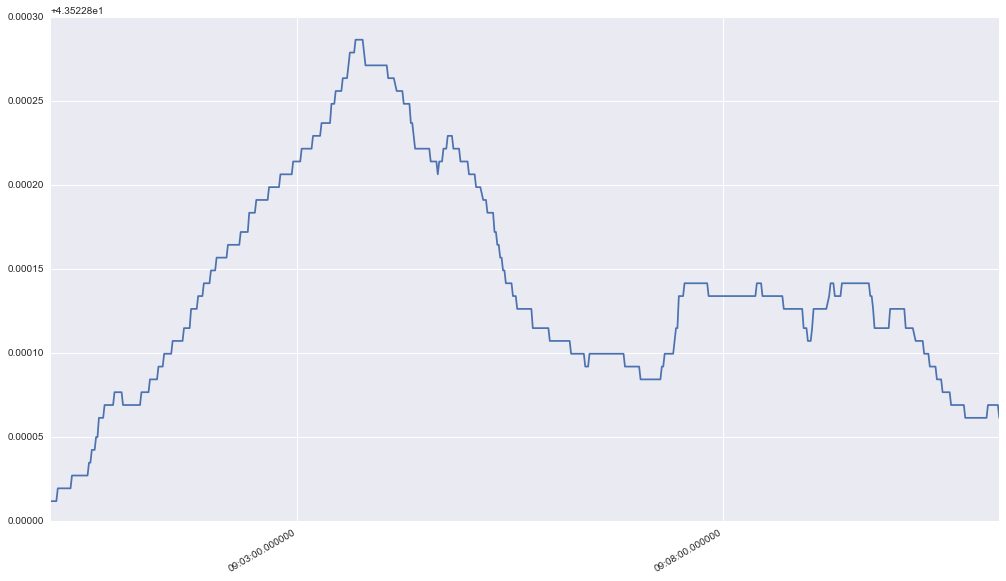

In [79]:
# let's have a look a the position of the data points
t._measurements['gps_lat'].plot()
plt.show()

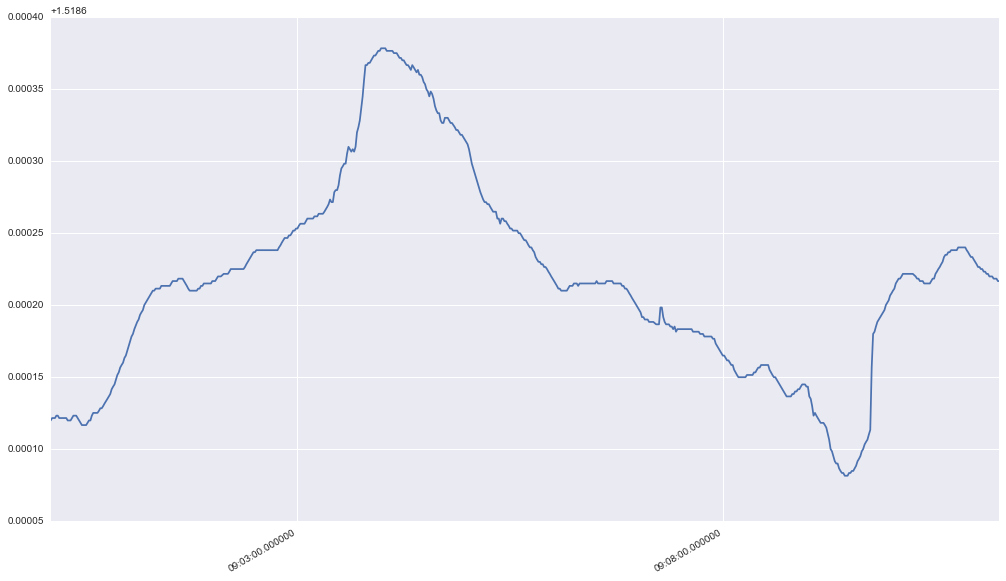

In [80]:
t._measurements['gps_lon'].plot()
plt.show()

In [81]:
# let's plot that on a map
import folium
m = folium.Map([t.currentValue('gps_lat'), t.currentValue('gps_lon')], zoom_start=18, tiles='Stamen Toner')
for i in np.arange(len(t._measurements.index.values)):
    lat = t._measurements['gps_lat'].values[i]
    lon = t._measurements['gps_lon'].values[i]
    folium.CircleMarker(location=[lat, lon], radius=1, fill_color='#3186cc', color='#3186cc').add_to(m)
m
# OK, at least we are where we were !

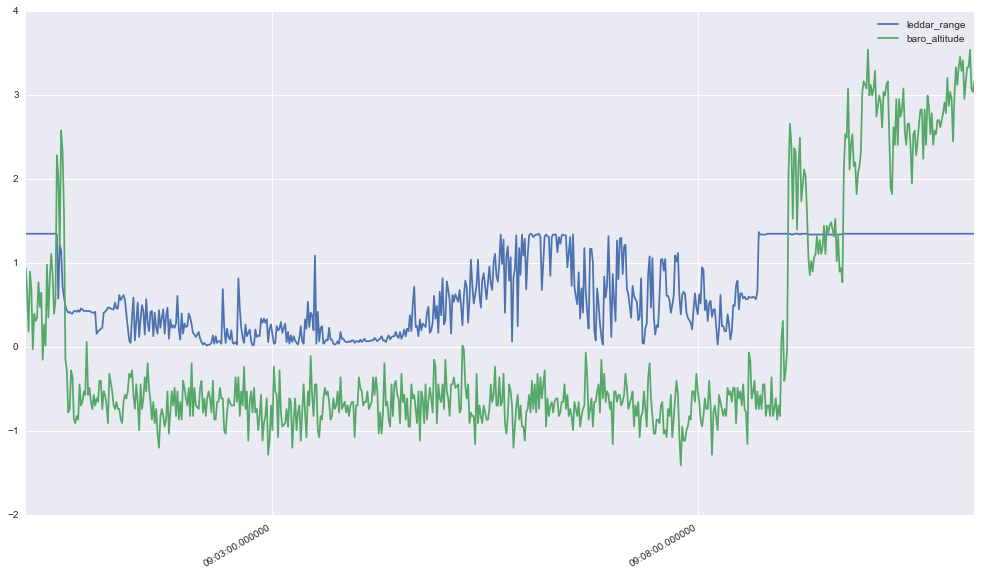

In [82]:
# look at measured values a little bit
t._measurements.loc[:, 'leddar_range'] = t._measurements['leddar_range'] * 0.01
#t._measurements.loc[:, 'leddar_range'] = t._measurements['leddar_range'] - np.mean(t._measurements['leddar_range'].values)
t._measurements.loc[:, 'baro_altitude'] = t._measurements['baro_altitude'] - np.mean(t._measurements['baro_altitude'].values)
t._measurements.loc[:, 'gps_altitude'] = t._measurements['gps_altitude'] - np.mean(t._measurements['gps_altitude'].values)

t._measurements['leddar_range'].plot()
t._measurements['baro_altitude'].plot()
plt.legend()
plt.show()

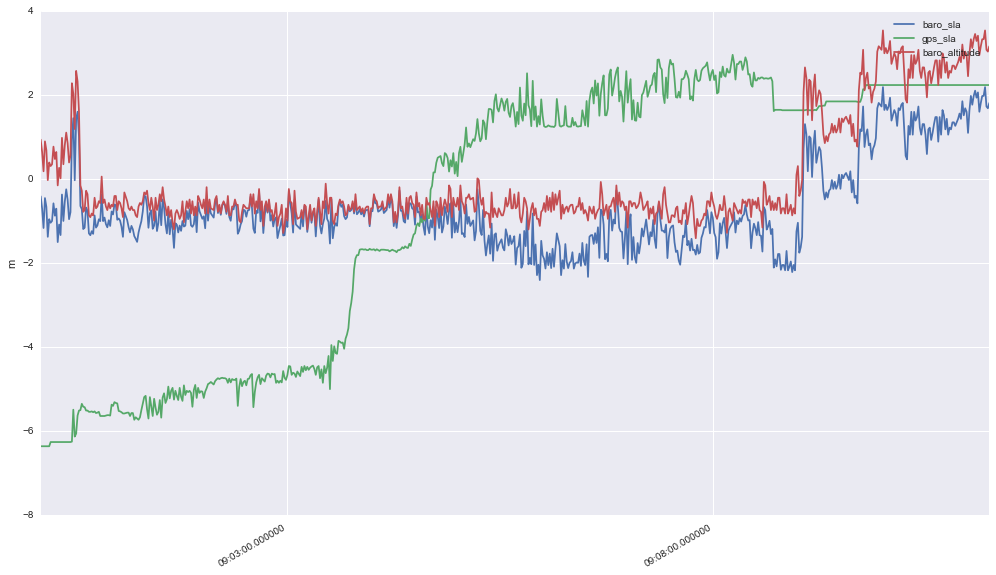

In [83]:
# let's estimate a height from altitude - range (should be as flat as possible)
baro_height = t._measurements['baro_altitude'].values - t._measurements['leddar_range'].values
gps_height = t._measurements['gps_altitude'].values - t._measurements['leddar_range'].values

sla = pd.DataFrame({'baro_sla':baro_height, 'gps_sla': gps_height}, index=t._measurements.index)

sla['baro_sla'].plot()
sla['gps_sla'].plot()

t._measurements['baro_altitude'].plot()
plt.ylabel('m')
plt.legend()
plt.show()